# Diabetes Prediction Homework

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # librarie de plotare
import seaborn as sns # librărie construită peste matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetes-dataset/diabetes.csv


## Read Data

In [4]:
dataset = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

## EDA - Exploratory Data Analysis

In [5]:
#!pip install ydata-profiling

In [6]:
#from ydata_profiling import ProfileReport

In [7]:
#report = ProfileReport(dataset, title="Diabetes Dataset")

In [8]:
#report

## Verify if missing data

In [9]:
dataset.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## Verify if there are any duplicates in the dataset

In [10]:
dataset.duplicated().any()

False

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Explore Data Ballance

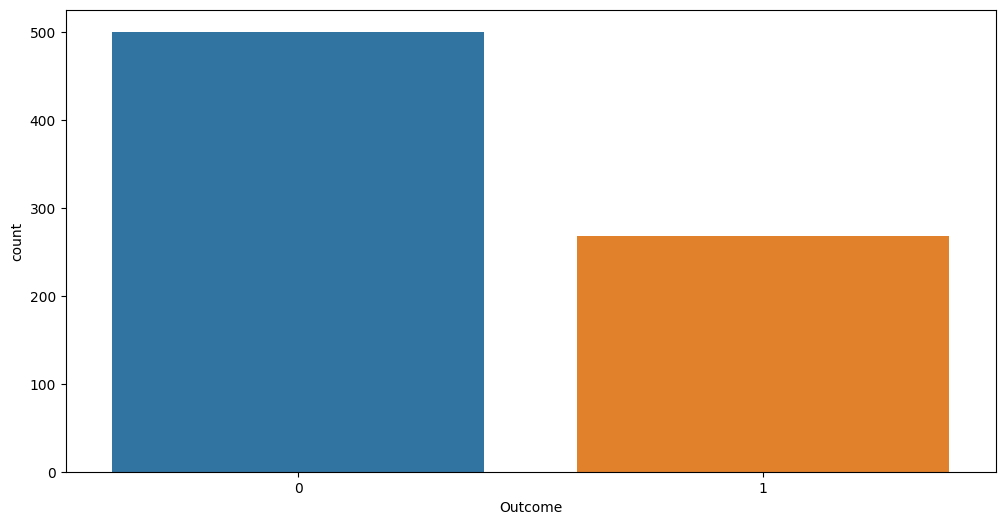

In [12]:
plt.figure(figsize = (12, 6))
sns.countplot(x="Outcome", data=dataset)
plt.show();

In [13]:
print(f"% of patients having diabetes: {sum(dataset['Outcome']) / len(dataset) * 100:.2f}%")

% of patients having diabetes: 34.90%


## Visualize data distributions

In [14]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

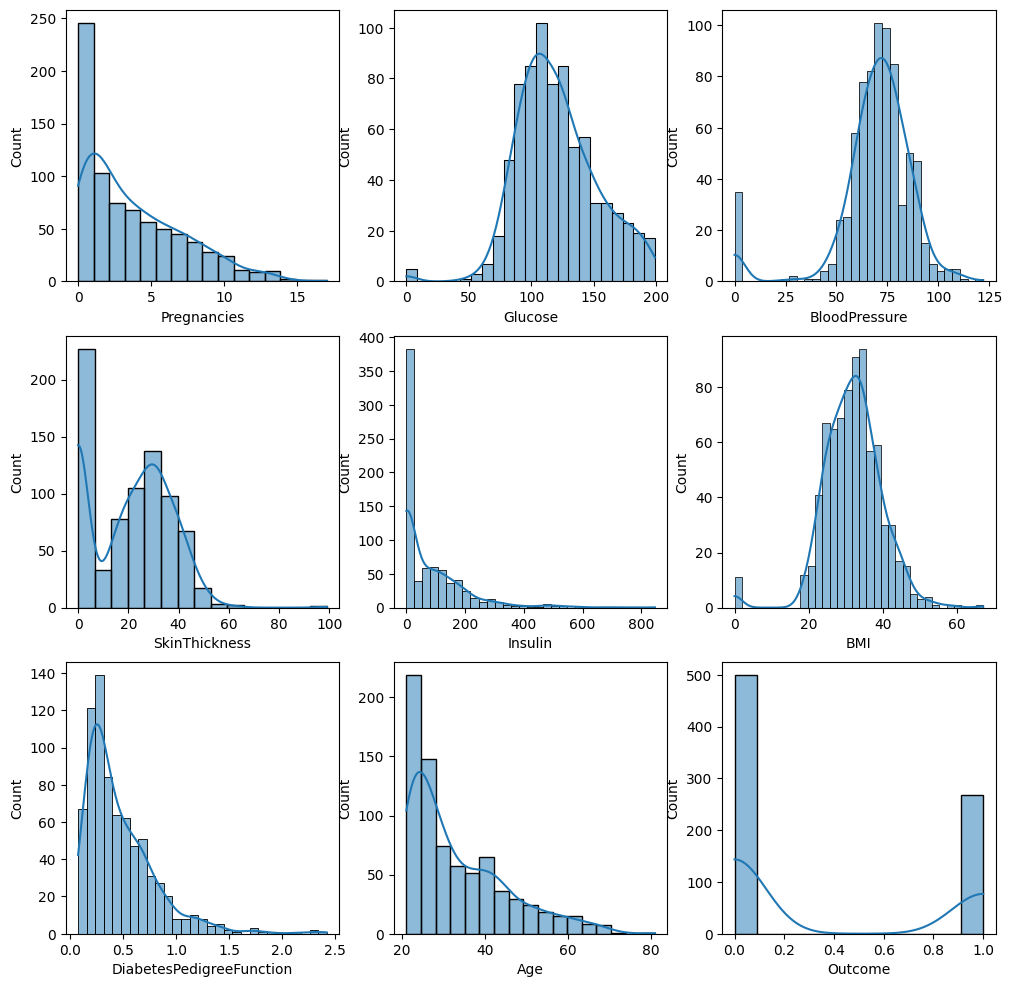

In [15]:
plt.figure(figsize = (12, 12))
for i, col in enumerate(dataset.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=col, data=dataset, kde=True)
plt.show();

## Visualize Feature Correlations
### Any value above 0.5 or below -0.5 signals high correlation between features

In [16]:
# Pearson Correlation Coefficient
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


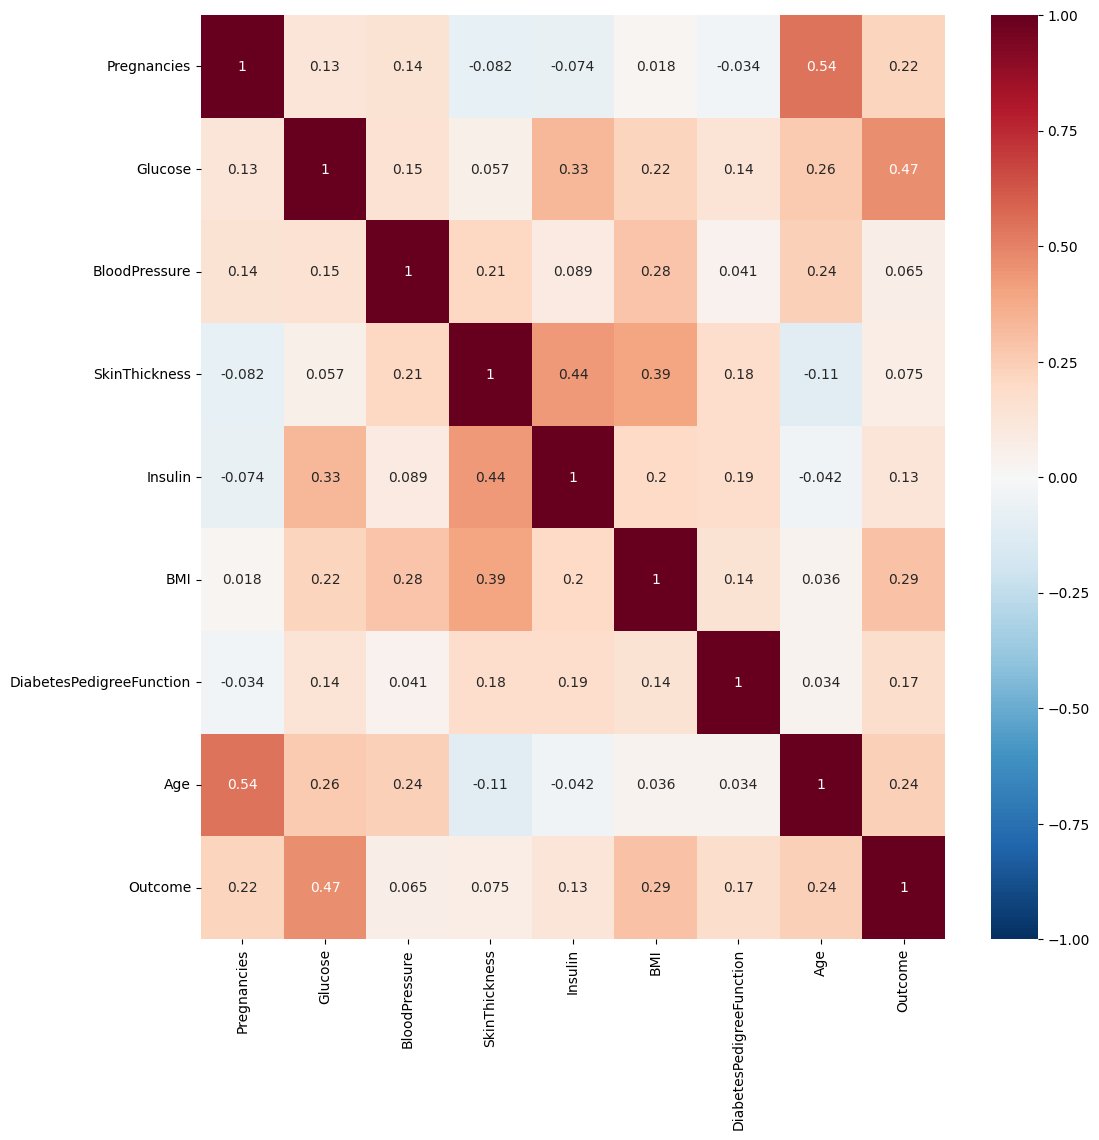

In [17]:
plt.figure(figsize=(12, 12))
sns.heatmap(dataset.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()

## Data Train Validation Split

In [18]:
X = dataset.drop(['Outcome'], axis=1)
y = dataset['Outcome']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train[X_train['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
182,1,0,74,20,23,27.7,0.299,21
349,5,0,80,32,0,41.0,0.346,37
502,6,0,68,41,0,39.0,0.727,41
342,1,0,68,35,0,32.0,0.389,22


In [22]:
X_train[X_train['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
9,8,125,96,0,0,0.0,0.232,54
60,2,84,0,0,0,0.0,0.304,21
706,10,115,0,0,0,0.0,0.261,30
684,5,136,82,0,0,0.0,0.640,69
522,6,114,0,0,0,0.0,0.189,26
426,0,94,0,0,0,0.0,0.256,25
145,0,102,75,23,0,0.0,0.572,21
49,7,105,0,0,0,0.0,0.305,24
371,0,118,64,23,89,0.0,1.731,21


In [23]:
sum(y_train) / len(y_train)

0.3485342019543974

## Data Preprocessing

## Glucose - 0 is not a valid glucose level
## BloodPressure - 0 is not a valid BP value
## SkinThickness - 0 is unlikely and often missing
## Insulin - 0 means missing (not tested)
## BMI - 0 is not valid (BMI cannot be zero)

In [24]:
X_train[X_train['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
182,1,0,74,20,23,27.7,0.299,21
349,5,0,80,32,0,41.0,0.346,37
502,6,0,68,41,0,39.0,0.727,41
342,1,0,68,35,0,32.0,0.389,22


In [25]:
X_train[X_train['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
9,8,125,96,0,0,0.0,0.232,54
60,2,84,0,0,0,0.0,0.304,21
706,10,115,0,0,0,0.0,0.261,30
684,5,136,82,0,0,0.0,0.640,69
522,6,114,0,0,0,0.0,0.189,26
426,0,94,0,0,0,0.0,0.256,25
145,0,102,75,23,0,0.0,0.572,21
49,7,105,0,0,0,0.0,0.305,24
371,0,118,64,23,89,0.0,1.731,21


In [26]:
X_train[X_train['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
46,1,146,56,0,0,29.7,0.564,29
339,7,178,84,0,0,39.9,0.331,41
694,2,90,60,0,0,23.5,0.191,25
33,6,92,92,0,0,19.9,0.188,28
218,5,85,74,22,0,29.0,1.224,32
...,...,...,...,...,...,...,...,...
154,8,188,78,0,0,47.9,0.137,43
451,2,134,70,0,0,28.9,0.542,23
113,4,76,62,0,0,34.0,0.391,25
556,1,97,70,40,0,38.1,0.218,30


In [27]:
replacement_value = X_train['Glucose'].median()

In [28]:
replacement_value

117.0

In [29]:
X_train['Glucose'] = X_train['Glucose'].replace(0, replacement_value)

In [30]:
X_train[X_train['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [31]:
replacement_value1 = X_train['BloodPressure'].median()
X_train['BloodPressure'] = X_train['BloodPressure'].replace(0, replacement_value1)
replacement_value2 = X_train['SkinThickness'].median()
X_train['SkinThickness'] = X_train['SkinThickness'].replace(0, replacement_value2)
replacement_value3 = X_train['BMI'].median()
X_train['BMI'] = X_train['BMI'].replace(0, replacement_value3)

In [32]:
X_train[X_train['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [36]:
X_train[X_train['Pregnancies'] >= 10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
34,10,122,78,31,0,27.6,0.512,45
464,10,115,98,23,0,24.0,1.022,34
323,13,152,90,33,29,26.8,0.731,43
375,12,140,82,43,325,39.2,0.528,58
306,10,161,68,23,132,25.5,0.326,47
658,11,127,106,23,0,39.0,0.190,51
744,13,153,88,37,140,40.6,1.174,39
691,13,158,114,23,0,42.3,0.257,44
358,12,88,74,40,54,35.3,0.378,48
614,11,138,74,26,144,36.1,0.557,50


## Training and Validation 

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### Compute False Positive & False Negative Rate 

In [34]:
# Compute Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_val, gnb_probs_val).ravel()

# Compute FPR & FNR
fpr = fp / (fp + tn)  # False Positive Rate
fnr = fn / (fn + tp)  # False Negative Rate

print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

NameError: name 'confusion_matrix' is not defined

## How to modify conditions when Naive Bayes predicts 1
### predict_proba - returns percentages for 0 and 1
### By changing 0.5 percent we modify the threshold for predicting 1

In [ ]:
gnb_probs_proba = gnb.predict_proba(X_train)
gnb_probs = (gnb_probs_proba[:,1] >= 0.5).astype(int)